In [4]:
# user defined functions
import odor_statistics_lib as osm

# dataframes
import pandas as pd
import h5py

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import signal
from scipy import stats

#plots
import figurefirst
from figurefirst import FigureLayout,mpl_functions
import matplotlib.ticker as mtick
import pylab as plt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
pd.options.mode.chained_assignment = None

#PCA and Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d

In [5]:
dir = '~/Documents/Myfiles/DataAnalysis/data/Sprints/HighRes/'
df = pd.read_hdf(dir+'Windy/WindyStats.h5')

In [11]:
features = df[['mean_ef','log_whiff', 'mean_ma', 'mean_concentration']]
target = df['log_avg_dist_from_source']
# Separating out the features
# x = df.reindex(columns = features)
# Separating out the target
y = target
# Standardizing the features
x = StandardScaler().fit_transform(features)

In [12]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca1','pca2'])

In [13]:
testdf = pd.concat([principalDf, df.log_avg_dist_from_source], axis = 1)

### Extracting index based on Distance

In [14]:
index1 = testdf.loc[(testdf.log_avg_dist_from_source <= 0)].index
index2 = testdf.loc[(testdf.log_avg_dist_from_source > 0) & (testdf.log_avg_dist_from_source <= 1)].index
index3 = testdf.loc[(testdf.log_avg_dist_from_source > 1)].index

In [15]:
# pca.explained_variance_ratio_

### Plotting PCA components

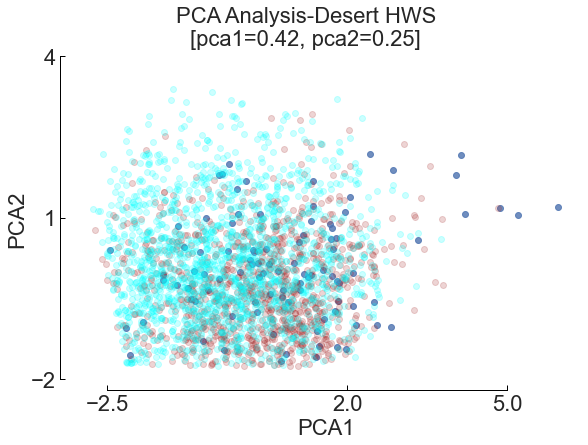

In [26]:
f, ax = plt.subplots(1,1,figsize=(8,6))
ax.grid(False)
ax.plot(testdf.pca1[index1],testdf.pca2[index1],'o', c='b', alpha=0.8,label='log_distance <= $10^{0}$')
ax.plot(testdf.pca1[index2],testdf.pca2[index2],'o', c='brown', alpha=0.2,
        label='$10^{0}$ < log_distance <= $10^{1}$')
ax.plot(testdf.pca1[index3],testdf.pca2[index3],'o', c='cyan',alpha=0.2, label='log_distance > $10^{1}$')

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')



mpl_functions.adjust_spines(ax,['left', 'bottom'],spine_locations={},
                            smart_bounds=True, xticks=[-2.5,2,5],yticks=[-2,1,4],linewidth=1)


f.suptitle('PCA Analysis-Desert HWS\n[pca1=0.42, pca2=0.25]')
f.tight_layout(pad=1)

figurefirst.mpl_functions.set_fontsize(f, 22)
# leg = ax.legend(loc='lower right', fontsize=15)

# ax.legend(loc='upper right', bbox_to_anchor=(1.2,0.4),  fontsize=15)


In [27]:
f.savefig('../../Figure/PCA_HWS_all.jpeg', dpi=150, bbox_inches = "tight")

### Implementing KMeans Clustering

In [32]:
k_means = KMeans(init = 'k-means++', n_clusters = 3, n_init = 35)
k_means.fit(principalComponents)

KMeans(n_clusters=3, n_init=35)

In [33]:
pca.explained_variance_ratio_

array([0.41835257, 0.25578076])

### Plotting PCA with K-means centers and Voronoi Regions

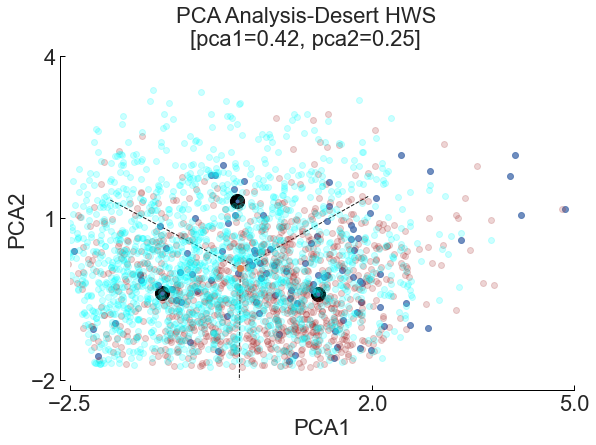

In [34]:
f, ax = plt.subplots(1,1,figsize=(8,6))
ax.grid(False)
ax.plot(testdf.pca1[index1],testdf.pca2[index1],'o', c='b', alpha=0.8,label='log_distance <= $10^{0}$')
ax.plot(testdf.pca1[index2],testdf.pca2[index2],'o', c='brown', alpha=0.2,label='$10^{0}$ < log_distance <= $10^{1}$')
ax.plot(testdf.pca1[index3],testdf.pca2[index3],'o', c='cyan',alpha=0.2, label='log_distance > $10^{1}$')

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
centers=k_means.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=1);
vor = Voronoi(centers)
voronoi_plot_2d(vor, plt.gca())

mpl_functions.adjust_spines(ax,['left', 'bottom'],spine_locations={},
                            smart_bounds=True, xticks=[-2.5,2,5],yticks=[-2,1,4],linewidth=1)



f.suptitle('PCA Analysis-Desert HWS\n[pca1=0.42, pca2=0.25]')
f.tight_layout(pad=1)

figurefirst.mpl_functions.set_fontsize(f, 22)
# leg = ax.legend(loc='lower right', fontsize=15)
# ax.legend(loc='upper right', bbox_to_anchor=(1.2,0.4),  fontsize=15)



In [35]:
f.savefig('../../Figure/PCA_HWS_All3.jpeg', dpi=150, bbox_inches = "tight")